In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch
from matplotlib.colors import to_rgba
from statsbombpy import sb
import pandas as pd

In [2]:
partido = sb.events(match_id=3869685)

In [3]:
partido[['x', 'y']] = partido['location'].apply(pd.Series)
partido[['end_x', 'end_y']] = partido['pass_end_location'].apply(pd.Series)
partido['pasador'] = partido['player']
partido['receptor'] = partido['player'].shift(-1)
pases_partido = partido[(partido['type'] == 'Pass') & (partido['team'] == 'Argentina')]

completados = pases_partido[pases_partido['pass_outcome'].isna() == True]


In [4]:
completados.minute.describe()

count    560.000000
mean      57.198214
std       35.113132
min        0.000000
25%       31.000000
50%       50.000000
75%       92.000000
max      123.000000
Name: minute, dtype: float64

In [5]:
firstSub = partido[(partido['type'] == 'Substitution') & (partido['team'] == 'Argentina')].minute.min()
completados_cambio = completados[completados['minute'] < firstSub]
average_locations = completados_cambio.groupby('player').agg({'x': ['mean'], 'y': ['mean', 'count']})


In [6]:
pass_between = completados_cambio.groupby(['pasador', 'receptor']).id.count().reset_index()
pass_between.rename({'id': 'pass_count'}, axis='columns',inplace=True)

In [7]:
average_locations.columns = average_locations.columns.droplevel(0)

In [8]:
average_locations['x'] = average_locations.iloc[:, 0]
average_locations['y'] = average_locations.iloc[:, 1]
average_locations = average_locations.drop(columns=['mean'])

In [9]:
pass_between = pass_between.merge(average_locations, left_on='pasador', right_index=True)
pass_between = pass_between.merge(average_locations, left_on='receptor', right_index=True, suffixes=['','_end'])
pass_between = pass_between[pass_between['pass_count'] > 1]

In [10]:
pass_between

,pasador,receptor,pass_count,count,x,y,count_end,x_end,y_end
0,Alexis Mac Allister,Enzo Fernandez,6,24,68.737500,23.845833,40,56.135000,36.532500
2,Alexis Mac Allister,Lionel Andrés Messi Cuccittini,4,24,68.737500,23.845833,27,71.588889,51.096296
3,Alexis Mac Allister,Nicolás Alejandro Tagliafico,4,24,68.737500,23.845833,28,58.567857,7.335714
8,Alexis Mac Allister,Ángel Fabián Di María Hernández,5,24,68.737500,23.845833,25,79.884000,11.448000
10,Cristian Gabriel Romero,Damián Emiliano Martínez,3,39,33.905128,53.346154,12,12.641667,43.966667
12,Cristian Gabriel Romero,Enzo Fernandez,7,39,33.905128,53.346154,40,56.135000,36.532500
13,Cristian Gabriel Romero,Julián Álvarez,2,39,33.905128,53.346154,13,76.346154,37.538462
15,Cristian Gabriel Romero,Nahuel Molina Lucero,5,39,33.905128,53.346154,28,59.414286,72.085714
16,Cristian Gabriel Romero,Nicolás Hernán Otamendi,9,39,33.905128,53.346154,44,38.279545,23.350000
17,Cristian Gabriel Romero,Rodrigo Javier De Paul,8,39,33.905128,53.346154,37,59.159459,59.248649


In [11]:
MAX_LINE_WIDTH = 13
pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() * MAX_LINE_WIDTH)

MIN_TRANSPARENCY = 0.000001
color = np.array(to_rgba('yellow'))
color = np.tile(color, (len(pass_between), 1))
c_transparency = pass_between.pass_count / pass_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

MAX_MARKER_SIZE=800
average_locations['marker_size'] = (average_locations['count'] / average_locations['count'].max() * MAX_MARKER_SIZE)

In [12]:
def generar_mapa_pases(pases_comp, minuto_inicial, minuto_final, ax):
    completados = pases_comp[(pases_comp['minute'] >= minuto_inicial) & (pases_comp['minute'] < minuto_final)]
    average_locations = completados.groupby('player').agg({'x': ['mean'], 'y': ['mean', 'count']})
    pass_between = completados_cambio.groupby(['pasador', 'receptor']).id.count().reset_index()
    pass_between.rename({'id': 'pass_count'}, axis='columns',inplace=True)
    average_locations.columns = average_locations.columns.droplevel(0)
    average_locations['x'] = average_locations.iloc[:, 0]
    average_locations['y'] = average_locations.iloc[:, 1]
    average_locations = average_locations.drop(columns=['mean'])
    pass_between = pass_between.merge(average_locations, left_on='pasador', right_index=True)
    pass_between = pass_between.merge(average_locations, left_on='receptor', right_index=True, suffixes=['','_end'])
    pass_between = pass_between[pass_between['pass_count'] > 1]
    MAX_LINE_WIDTH = 13
    pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() * MAX_LINE_WIDTH)

    MIN_TRANSPARENCY = 0.000001
    color = np.array(to_rgba('yellow'))
    color = np.tile(color, (len(pass_between), 1))
    c_transparency = pass_between.pass_count / pass_between.pass_count.max()
    c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
    color[:, 3] = c_transparency

    MAX_MARKER_SIZE=800
    average_locations['marker_size'] = (average_locations['count'] / average_locations['count'].max() * MAX_MARKER_SIZE)
    
    pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#292323', line_color='#c7d5cc', goal_type='box', goal_alpha=.8)
    pitch.draw(constrained_layout=False, tight_layout=True,ax=ax)

    arrows = pitch.arrows(pass_between.x, pass_between.y, pass_between.x_end, pass_between.y_end, ax=ax, color=color, zorder=.99)

    nodes = pitch.scatter(average_locations.x, average_locations.y, ax=ax, color='white', ec='black', s=average_locations['marker_size'])
    
    TITLE_TEXT = f'Min {minuto_inicial}-{minuto_final}'
    ax.text(40, 105, TITLE_TEXT, color='#c7d5cc', va='center', ha='center', fontsize=20)


        

In [13]:
partido[['x', 'y']] = partido['location'].apply(pd.Series)
partido[['end_x', 'end_y']] = partido['pass_end_location'].apply(pd.Series)
partido['pasador'] = partido['player']
partido['receptor'] = partido['player'].shift(-1)
pases_partido = partido[(partido['type'] == 'Pass') & (partido['team'] == 'Argentina')]

completados_tot = pases_partido[pases_partido['pass_outcome'].isna() == True]

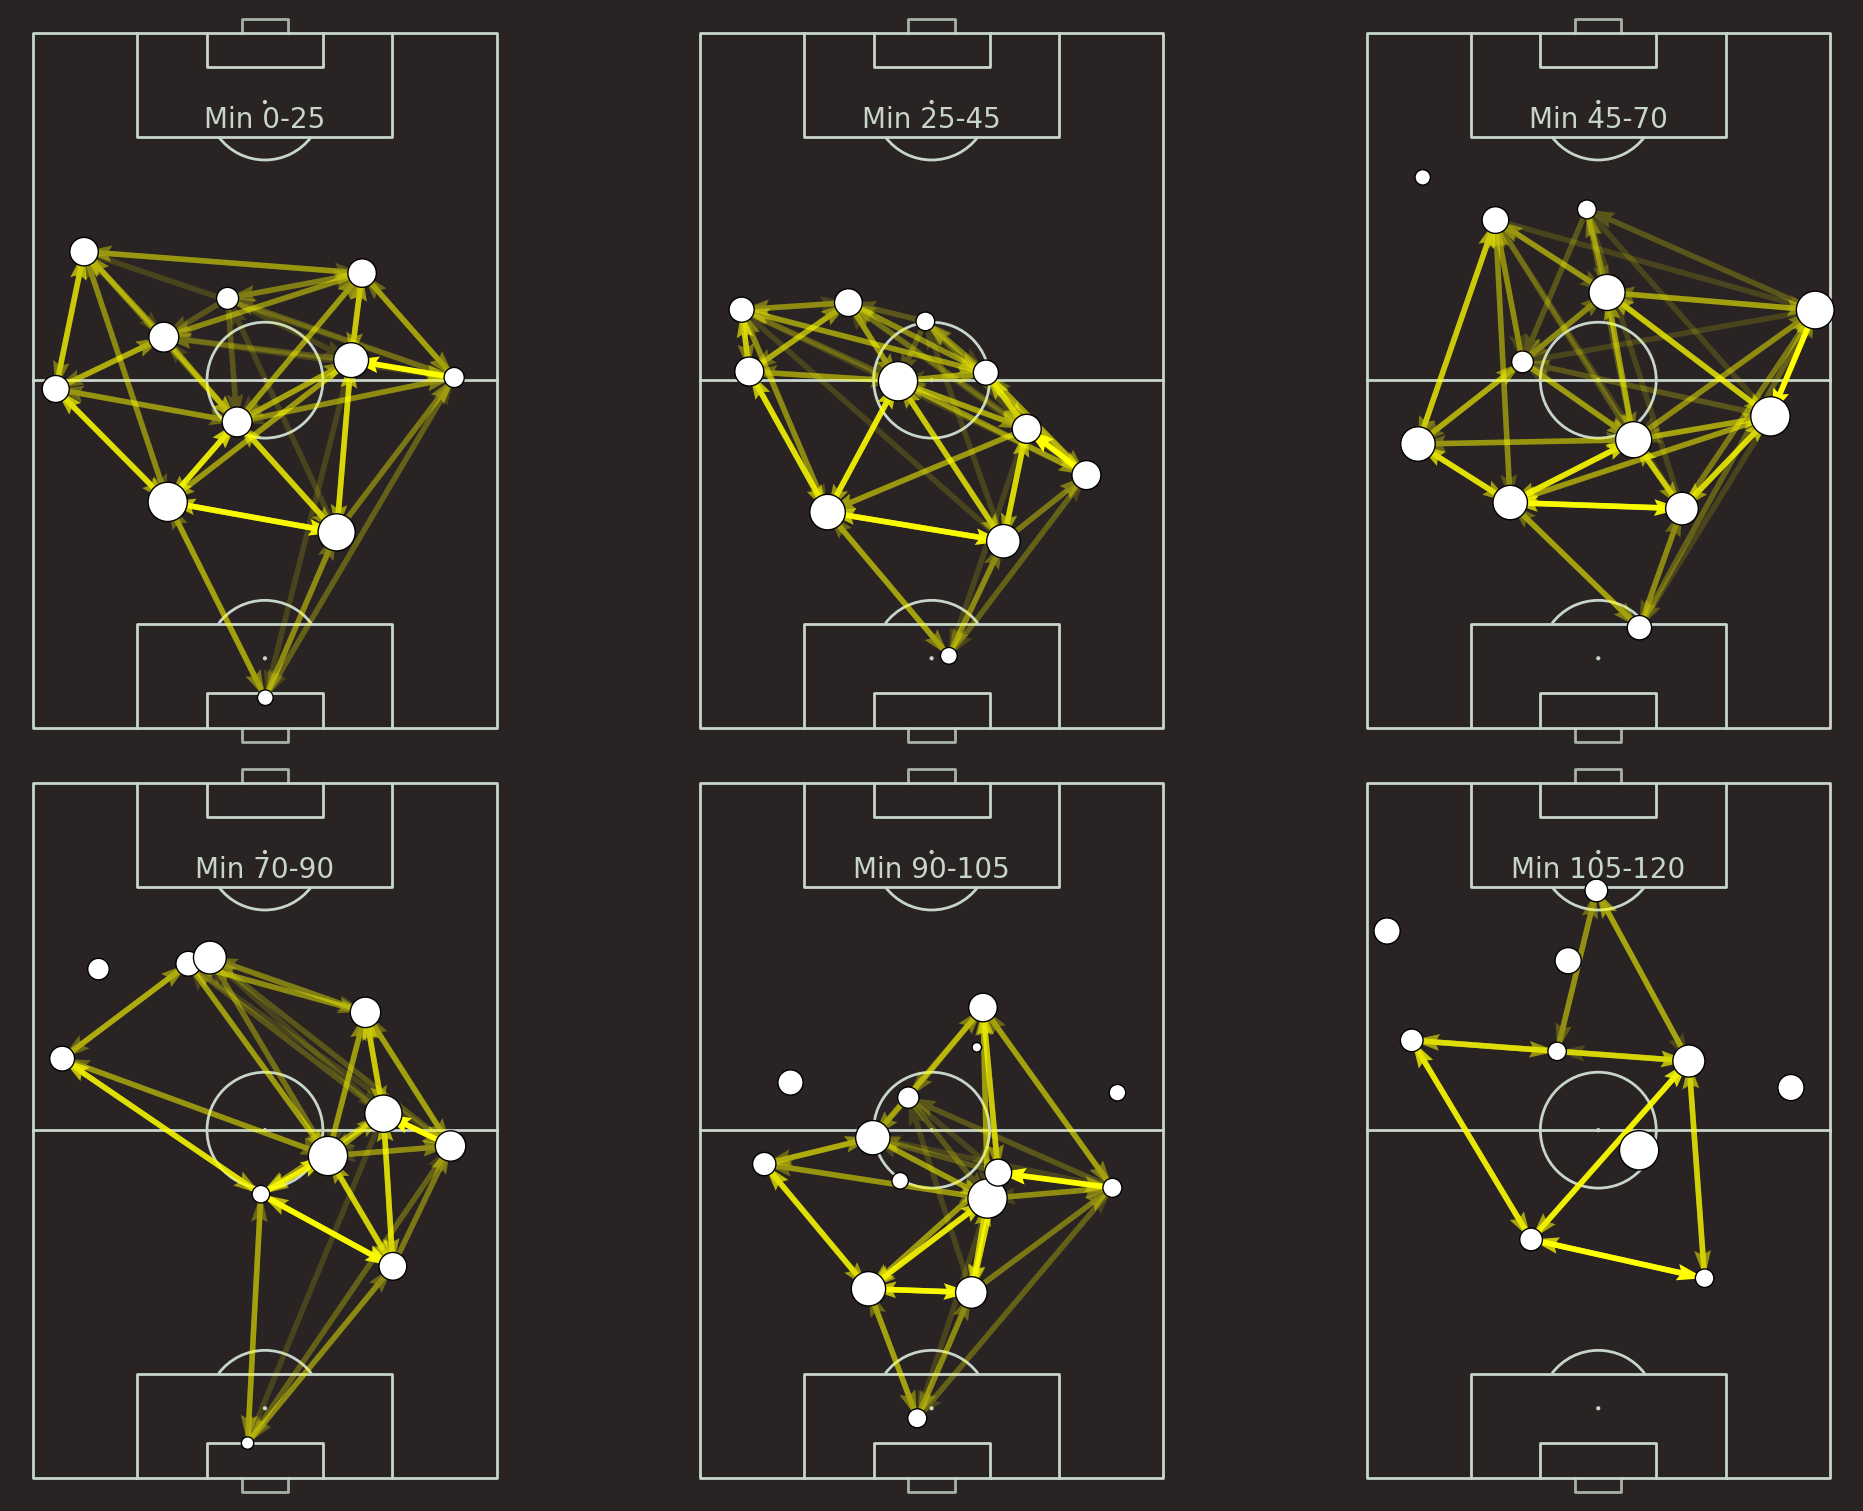

In [14]:
fig = plt.figure(figsize=(20,15),constrained_layout=True)
gs = fig.add_gridspec(nrows=6,ncols=6)
fig.set_facecolor('#292323')

ax1 = fig.add_subplot(gs[0:3,0:2])
generar_mapa_pases(completados_tot, 0, 25, ax1)

ax2 = fig.add_subplot(gs[0:3,2:4])
generar_mapa_pases(completados_tot, 25, 45, ax2)


ax3 = fig.add_subplot(gs[0:3,4:])
generar_mapa_pases(completados_tot, 45, 70, ax3)


ax4 = fig.add_subplot(gs[3:,0:2])
generar_mapa_pases(completados_tot, 70, 90, ax4)


ax5 = fig.add_subplot(gs[3:,2:4])
generar_mapa_pases(completados_tot, 90, 105, ax5)


ax6 = fig.add_subplot(gs[3:,4:])
generar_mapa_pases(completados_tot, 105, 120, ax6)

